# **Basic Set up**

In [2]:
!pip3 install scikit-plot --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [2]:
#load the models first

yaml_file = open('25-epoch-nan-test-model-files/seq2seq_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("25-epoch-nan-test-model-files/seq2seq_model.h5")
print("Loaded model from disk")


with open("25-epoch-nan-test-model-files/seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

/home/david/.local/lib/python3.6/site-packages/tensorflow/python/keras/saving/model_config.py:88: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


Loaded model from disk
{'loss': [3.281733274459839, 1.7831865549087524, 1.6721339225769043, 1.5634510517120361, 1.4391958713531494, 1.3493270874023438, 1.2792824506759644, 1.226438045501709, 1.1855065822601318, 1.1508135795593262, 1.1217379570007324, 1.099082589149475, 1.0802968740463257, 1.0637121200561523, 1.0490868091583252, 1.0362217426300049, 1.0237798690795898, 1.0127829313278198, 1.0016732215881348, 0.9940621256828308, 0.9811443090438843, 0.9698154330253601, 0.9594495892524719, 0.9489661455154419, 0.9390327334403992], 'accuracy': [0.6383941173553467, 0.651537299156189, 0.651537299156189, 0.6606096625328064, 0.6987611055374146, 0.7184672355651855, 0.7259487509727478, 0.7365508675575256, 0.7438873052597046, 0.7491206526756287, 0.7546338438987732, 0.7582226395606995, 0.7608337998390198, 0.7635192275047302, 0.7663978338241577, 0.7683215141296387, 0.7703413963317871, 0.7716944217681885, 0.7733107805252075, 0.7741605639457703, 0.7763330936431885, 0.7784258723258972, 0.7800504565238953

In [3]:
#load the models first

bin_yaml_file = open('25-epoch-nan-test-model-files/binary_model.yaml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("25-epoch-nan-test-model-files/binary_model.h5")
print("Loaded model from disk")

with open("25-epoch-nan-test-model-files/binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'loss': [0.697236955165863, 0.6932038068771362, 0.693263590335846, 0.693221926689148, 0.6931005120277405, 0.6929437518119812, 0.6929799914360046, 0.6929938197135925, 0.692946195602417, 0.6930437684059143, 0.6928693056106567, 0.692919135093689, 0.6929827332496643, 0.6930616497993469, 0.6928507685661316, 0.6928532719612122, 0.6930197477340698, 0.6928333640098572, 0.692945122718811, 0.6929513216018677, 0.6927085518836975, 0.6929314136505127, 0.6927437782287598, 0.6928878426551819, 0.6927033066749573], 'accuracy': [0.501683235168457, 0.501311182975769, 0.5050143599510193, 0.5049434900283813, 0.5042524337768555, 0.5034373998641968, 0.50545734167099, 0.5054927468299866, 0.5034728646278381, 0.5054927468299866, 0.504996657371521, 0.501222550868988, 0.504996657371521, 0.5032424926757812, 0.504837155342102, 0.5018072724342346, 0.5051560997962952, 0.5049257874488831, 0.5054041743278503, 0.5028881430625916, 0.5057762265205383, 0.5050675272941589, 0.5051560997962952, 0.50508

In [4]:
with open("25-epoch-nan-test-model-files/y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("25-epoch-nan-test-model-files/y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

1000
1000


In [5]:
EPOCHS = 25

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5, 1.0, 'Loss for Seq2Seq')

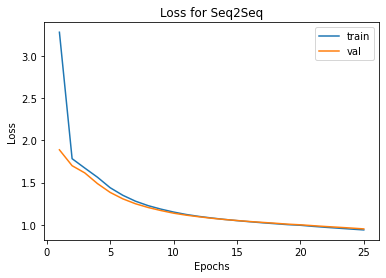

In [6]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5, 1.0, 'Accuracy for Seq2Seq')

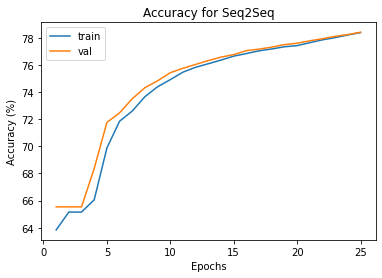

In [7]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [8]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 485, 1: 515}


In [9]:
y_pred

array([[0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.4806915 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.5019562 ],
       [0.501

Text(0.5, 1.0, 'Loss for Binary Classifier')

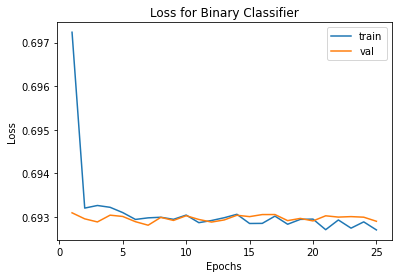

In [10]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5, 1.0, 'Accuracy for Binary Classifier')

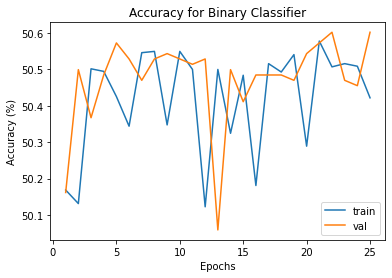

In [11]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

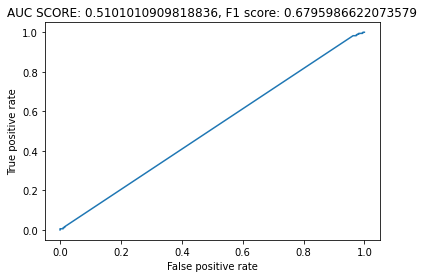

In [12]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

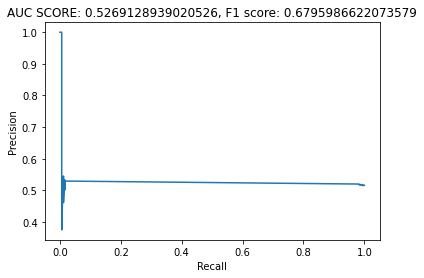

In [13]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

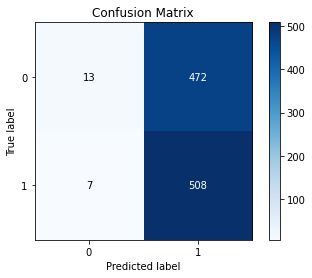

In [14]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()